In [1]:
import inspect
import tensorflow as tf
#from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow.keras,os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
#Building VGG-16 model



model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation=tf.nn.leaky_relu))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation=tf.nn.leaky_relu))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.leaky_relu))
model.add(Dropout(0.05))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.leaky_relu))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.leaky_relu))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.leaky_relu))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.leaky_relu))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation=tf.nn.leaky_relu))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation=tf.nn.leaky_relu))
model.add(Dropout(0.1))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation=tf.nn.leaky_relu))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation=tf.nn.leaky_relu))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation=tf.nn.leaky_relu))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation=tf.nn.leaky_relu))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


In [3]:
#fully connected layer
model.add(Flatten())
model.add(Dense(units=4096,activation=tf.nn.leaky_relu))
model.add(Dropout(0.2))
model.add(Dense(units=4096,activation=tf.nn.leaky_relu))
model.add(Dense(units=10, activation="softmax"))

In [4]:
#compiling the model with SGD optimiser

opt = SGD(lr=0.0001)
model.compile(optimizer=opt, loss=tensorflow.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [5]:
#loading the training daa through ImageDataGenerator

trdata = ImageDataGenerator()
#traindata = trdata.flow_from_directory(directory="test",target_size=(224,224), batch_size=16)
traindata = trdata.flow_from_directory(directory="C:\\Users\\PranavDevarakonda\\Documents\\project_papers\\data\\imgs\\train",target_size=(224,224), batch_size=4)

Found 22424 images belonging to 10 classes.


In [6]:
#testdata

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224), batch_size=8)

Found 410 images belonging to 10 classes.


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=45, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=125,generator=traindata, validation_data= testdata, validation_steps=10,epochs=105,callbacks=[checkpoint,early])

model.save("vgg_lrely_22kimgs.h5")

Epoch 1/105
125/125 [==============================] - 49s 392ms/step - loss: 2.3587 - accuracy: 0.1180 - val_loss: 2.2888 - val_accuracy: 0.1250
Epoch 2/105
125/125 [==============================] - 53s 425ms/step - loss: 2.3181 - accuracy: 0.1100 - val_loss: 2.2598 - val_accuracy: 0.2500
Epoch 3/105
125/125 [==============================] - 55s 439ms/step - loss: 2.2624 - accuracy: 0.1560 - val_loss: 2.2680 - val_accuracy: 0.2000
Epoch 4/105
125/125 [==============================] - 62s 498ms/step - loss: 2.2250 - accuracy: 0.2000 - val_loss: 2.2295 - val_accuracy: 0.1750
Epoch 5/105
125/125 [==============================] - 70s 559ms/step - loss: 2.2037 - accuracy: 0.1780 - val_loss: 2.1409 - val_accuracy: 0.4500
Epoch 6/105
125/125 [==============================] - 76s 606ms/step - loss: 2.1719 - accuracy: 0.1960 - val_loss: 2.1474 - val_accuracy: 0.3500
Epoch 7/105
125/125 [==============================] - 82s 659ms/step - loss: 2.0996 - accuracy: 0.2780 - val_loss: 2.1109 -

125/125 [==============================] - 105s 841ms/step - loss: 1.5149 - accuracy: 0.4920 - val_loss: 1.6443 - val_accuracy: 0.5250
Epoch 19/105
125/125 [==============================] - 105s 838ms/step - loss: 1.4763 - accuracy: 0.4960 - val_loss: 1.5659 - val_accuracy: 0.5375
Epoch 20/105
125/125 [==============================] - 104s 832ms/step - loss: 1.4839 - accuracy: 0.5060 - val_loss: 1.5288 - val_accuracy: 0.5375
Epoch 21/105
125/125 [==============================] - 105s 841ms/step - loss: 1.3925 - accuracy: 0.5380 - val_loss: 1.5693 - val_accuracy: 0.4750
Epoch 22/105
125/125 [==============================] - 106s 847ms/step - loss: 1.3577 - accuracy: 0.5420 - val_loss: 1.4409 - val_accuracy: 0.5750
Epoch 23/105
125/125 [==============================] - 108s 867ms/step - loss: 1.3238 - accuracy: 0.5660 - val_loss: 1.3997 - val_accuracy: 0.6125
Epoch 24/105
125/125 [==============================] - 107s 859ms/step - loss: 1.2955 - accuracy: 0.5820 - val_loss: 1.2896 

125/125 [==============================] - 87s 698ms/step - loss: 0.8346 - accuracy: 0.7500 - val_loss: 0.9073 - val_accuracy: 0.8250
Epoch 37/105
125/125 [==============================] - 89s 714ms/step - loss: 0.8918 - accuracy: 0.7140 - val_loss: 0.7832 - val_accuracy: 0.8375
Epoch 38/105
125/125 [==============================] - 93s 740ms/step - loss: 0.8522 - accuracy: 0.7260 - val_loss: 0.8924 - val_accuracy: 0.8000
Epoch 39/105
125/125 [==============================] - 96s 764ms/step - loss: 0.8473 - accuracy: 0.7340 - val_loss: 0.7392 - val_accuracy: 0.8750
Epoch 40/105
125/125 [==============================] - 97s 775ms/step - loss: 0.8080 - accuracy: 0.7620 - val_loss: 0.7570 - val_accuracy: 0.8875
Epoch 41/105
125/125 [==============================] - 99s 788ms/step - loss: 0.8351 - accuracy: 0.7620 - val_loss: 0.7422 - val_accuracy: 0.8250
Epoch 42/105
125/125 [==============================] - 98s 781ms/step - loss: 0.7849 - accuracy: 0.7760 - val_loss: 0.8001 - val_a

125/125 [==============================] - 98s 782ms/step - loss: 0.4753 - accuracy: 0.8740 - val_loss: 0.4892 - val_accuracy: 0.9125
Epoch 55/105
125/125 [==============================] - 99s 790ms/step - loss: 0.4695 - accuracy: 0.8800 - val_loss: 0.5361 - val_accuracy: 0.8750
Epoch 56/105
125/125 [==============================] - 100s 797ms/step - loss: 0.4898 - accuracy: 0.8700 - val_loss: 0.5216 - val_accuracy: 0.8750
Epoch 57/105
125/125 [==============================] - 99s 792ms/step - loss: 0.4850 - accuracy: 0.8720 - val_loss: 0.4932 - val_accuracy: 0.9250
Epoch 58/105
125/125 [==============================] - 100s 800ms/step - loss: 0.5306 - accuracy: 0.8780 - val_loss: 0.4528 - val_accuracy: 0.9125
Epoch 59/105
125/125 [==============================] - 100s 799ms/step - loss: 0.3950 - accuracy: 0.9040 - val_loss: 0.5390 - val_accuracy: 0.8750
Epoch 60/105
125/125 [==============================] - 102s 815ms/step - loss: 0.3998 - accuracy: 0.9000 - val_loss: 0.4181 - v

125/125 [==============================] - 104s 831ms/step - loss: 0.4268 - accuracy: 0.9000 - val_loss: 0.3215 - val_accuracy: 0.9625
Epoch 73/105
125/125 [==============================] - 103s 827ms/step - loss: 0.3930 - accuracy: 0.9080 - val_loss: 0.3389 - val_accuracy: 0.9500
Epoch 74/105
125/125 [==============================] - 104s 833ms/step - loss: 0.3606 - accuracy: 0.9120 - val_loss: 0.3212 - val_accuracy: 0.9625
Epoch 75/105
125/125 [==============================] - 103s 826ms/step - loss: 0.3383 - accuracy: 0.9400 - val_loss: 0.3040 - val_accuracy: 0.9875
Epoch 76/105
125/125 [==============================] - 104s 834ms/step - loss: 0.2684 - accuracy: 0.9340 - val_loss: 0.3062 - val_accuracy: 0.9750
Epoch 77/105
125/125 [==============================] - 106s 845ms/step - loss: 0.2946 - accuracy: 0.9180 - val_loss: 0.3335 - val_accuracy: 0.9125
Epoch 78/105
125/125 [==============================] - 104s 830ms/step - loss: 0.3252 - accuracy: 0.9280 - val_loss: 0.2561 

125/125 [==============================] - 106s 845ms/step - loss: 0.2067 - accuracy: 0.9580 - val_loss: 0.2509 - val_accuracy: 0.9750
Epoch 91/105
125/125 [==============================] - 106s 845ms/step - loss: 0.2083 - accuracy: 0.9500 - val_loss: 0.3077 - val_accuracy: 0.9250
Epoch 92/105
125/125 [==============================] - 104s 832ms/step - loss: 0.1888 - accuracy: 0.9600 - val_loss: 0.2641 - val_accuracy: 0.9375
Epoch 93/105
125/125 [==============================] - 105s 843ms/step - loss: 0.2232 - accuracy: 0.9440 - val_loss: 0.2510 - val_accuracy: 0.9625
Epoch 94/105
125/125 [==============================] - 103s 827ms/step - loss: 0.1920 - accuracy: 0.9620 - val_loss: 0.2419 - val_accuracy: 0.9500
Epoch 95/105
125/125 [==============================] - 105s 836ms/step - loss: 0.2593 - accuracy: 0.9460 - val_loss: 0.2523 - val_accuracy: 0.9750
Epoch 96/105
125/125 [==============================] - 104s 829ms/step - loss: 0.2227 - accuracy: 0.9460 - val_loss: 0.2179 

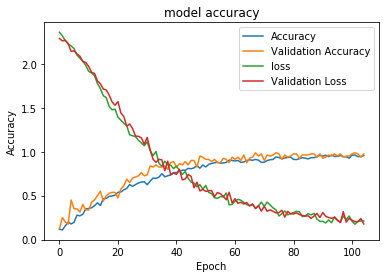

In [9]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [6]:
#resnet

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import LeakyReLU, Activation

base_model = ResNet50(include_top=False, weights='imagenet')
for layer in base_model.layers:
    if(hasattr(layer, 'activation') and layer.activation.__name__ == 'relu'):
        layer.activation = Activation(LeakyReLU())

x = base_model.output
 

x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation='relu')(x)

predictions = Dense(10, activation='softmax')(x)

model1 = Model(inputs=base_model.input, outputs=predictions)

In [7]:
model1.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics = ['accuracy'])

In [3]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input


x_train =  []
y_train = []

for i in range(10):
    path = "C:\\Users\\PranavDevarakonda\\Documents\\project_papers\\data\\imgs\\train\\c" + str(i)
    j = 0
    for file in os.listdir(path):
        im = (cv2.imread(path + "\\" + file))
        #print((im.shape))
        #im = im.reshape((1, 307200*3))
        im = cv2.resize(im, dsize=(224,224))
        im = preprocess_input(im)
        #print(im.shape)
        x_train.append(im)
        temp = [0]*10
        temp[i] = 1
        
        y_train.append(temp)
        
        #print(im)
        if(j==50):
            break
        j+=1
x_train = np.array(x_train)

print(x_train.shape)
y_train = np.array(y_train)
print(y_train.shape)

(510, 224, 224, 3)
(510, 10)


In [4]:
model1.fit(x_train, y_train, epochs=20)

Train on 510 samples
Epoch 1/20
510/510 [==============================] - 26s 51ms/sample - loss: 2.5236 - accuracy: 0.0961
Epoch 2/20
510/510 [==============================] - 14s 27ms/sample - loss: 2.3724 - accuracy: 0.1275
Epoch 3/20
510/510 [==============================] - 14s 28ms/sample - loss: 2.2029 - accuracy: 0.1824
Epoch 4/20
510/510 [==============================] - 15s 29ms/sample - loss: 2.0703 - accuracy: 0.3216
Epoch 5/20
510/510 [==============================] - 15s 29ms/sample - loss: 1.9574 - accuracy: 0.3843
Epoch 6/20
510/510 [==============================] - 15s 29ms/sample - loss: 1.8688 - accuracy: 0.4431
Epoch 7/20
510/510 [==============================] - 15s 30ms/sample - loss: 1.7539 - accuracy: 0.5471
Epoch 8/20
510/510 [==============================] - 16s 31ms/sample - loss: 1.6429 - accuracy: 0.6392
Epoch 9/20
510/510 [==============================] - 16s 32ms/sample - loss: 1.5637 - accuracy: 0.6980
Epoch 10/20
510/510 [======================

In [5]:
model1.save("resnet_one_dropout_50imgs_20epochs_99acc.h5")